# **2317鴻海 股票預測**

# 1. 建立初步預測

In [41]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# 獲取歷史股價數據
df = yf.download('2317.TW', start='2022-06-01', end='2023-06-01')
#print(df)

# 'Open, High, Low, Close, Adj Close, Volume'等欄位只保留'Close'欄位
price_data = df[['Close']].values
#print(price_data)

# 正規化數據(股價標準化0~1之間)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(price_data)
#print(scaled_data)

# 分割數據為訓練集與測試集
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 定義函數用於生成時間序列資料
def generate_sequences(data, seq_length):
    X=[]
    y=[]
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 設定時間序列長度
sequence_length = 10

# 生成訓練集的時間序列資料
X_train, y_train = generate_sequences(train_data, sequence_length)

# 生成測試集的時間序列資料
X_test, y_test = generate_sequences(test_data, sequence_length)

# 定義RNN模型(五個隱藏層)
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

# 編譯模型
model.compile(optimizer='adam', loss='mse')

# 訓練模型
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 使用模型進行預測
predictions = model.predict(X_test)

# 將預測結果還原回原始範圍
predicted_prices = scaler.inverse_transform(predictions)
#test_data = scaler.inverse_transform(test_data)

# 印出預測結果
for i in range(len(predicted_prices)):
    print(f"Predicted: {predicted_prices[i][0]}, Actual: {test_data[i+sequence_length][0]}")

# 預測未來股價
last_data = test_data[-sequence_length:]
future_sequence = np.array([last_data])
future_predictions = model.predict(future_sequence)
predicted_price = scaler.inverse_transform(future_predictions)
print(f"Predicted Future Price: {predicted_price[0][0]}")

# 指定要預測的日期
prediction_date = '2023-06-12'

# 取得指定日期的預測結果
predicted_price_pred = predicted_prices[-1][0]

print(f"Predicted Price for {prediction_date}: {predicted_price_pred}")

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 8s 186ms/step - loss: 0.6679
Epoch 2/10
6/6 [==============================] - 0s 83ms/step - loss: 0.1032
Epoch 3/10
6/6 [==============================] - 1s 107ms/step - loss: 0.0600
Epoch 4/10
6/6 [==============================] - 3s 562ms/step - loss: 0.0354
Epoch 5/10
6/6 [==============================] - 1s 103ms/step - loss: 0.0285
Epoch 6/10
6/6 [==============================] - 0s 57ms/step - loss: 0.0204
Epoch 7/10
6/6 [==============================] - 2s 391ms/step - loss: 0.0194
Epoch 8/10
6/6 [==============================] - 1s 98ms/step - loss: 0.0170
Epoch 9/10
6/6 [==============================] - 0s 53ms/step - loss: 0.0150
Epoch 10/10
2/2 [==============================] - 1s 12ms/step
Predicted: 104.07518005371094, Actual: 0.31428571428571406
Predicted: 104.0390625, Actual: 0.2857142857142856
Predicted: 104.38674926757812, Actual: 0.285714285

# 2. 描述性統計資料

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 9s 287ms/step - loss: 0.7996
Epoch 2/10
6/6 [==============================] - 0s 54ms/step - loss: 0.0828
Epoch 3/10
6/6 [==============================] - 0s 55ms/step - loss: 0.0541
Epoch 4/10
6/6 [==============================] - 1s 216ms/step - loss: 0.0368
Epoch 5/10
6/6 [==============================] - 0s 53ms/step - loss: 0.0318
Epoch 6/10
6/6 [==============================] - 0s 51ms/step - loss: 0.0305
Epoch 7/10
6/6 [==============================] - 0s 44ms/step - loss: 0.0223
Epoch 8/10
6/6 [==============================] - 1s 215ms/step - loss: 0.0201
Epoch 9/10
6/6 [==============================] - 3s 487ms/step - loss: 0.0183
Epoch 10/10
2/2 [==============================] - 1s 9ms/step
Predicted: 104.84912109375, Actual: 0.31428571428571406
Predicted: 105.02079772949219, Actual: 0.2857142857142856
Predicted: 104.53253936767578, Actual: 0.2857142

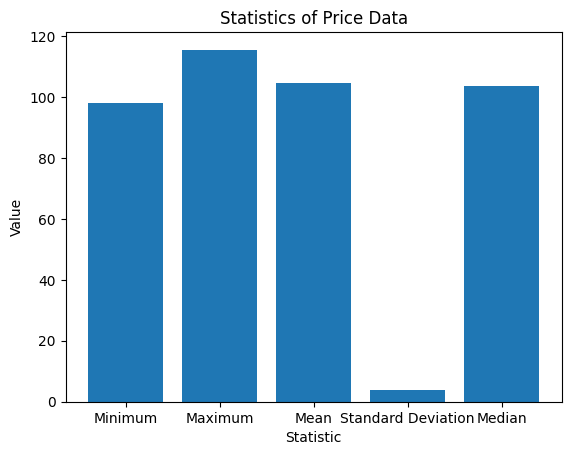

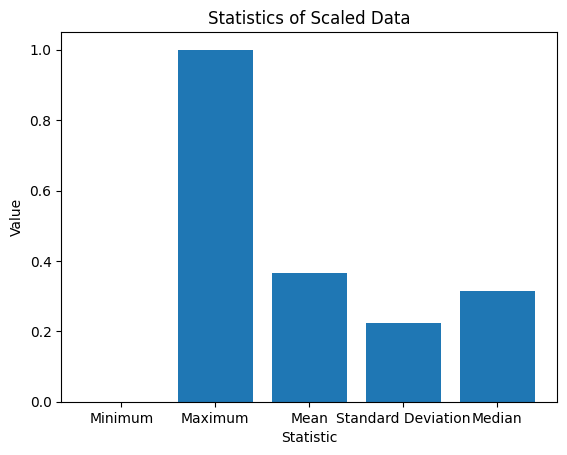

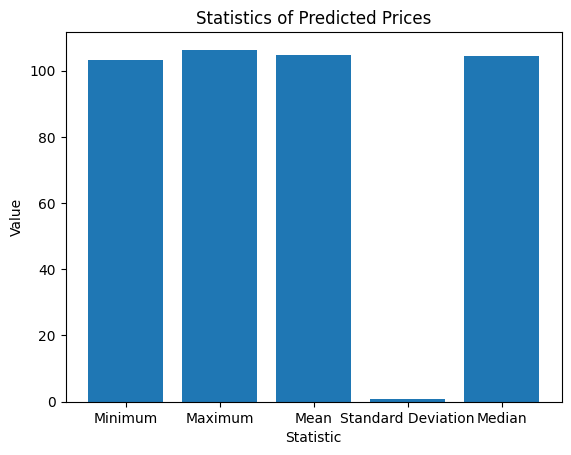

In [61]:
import yfinance as yf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 獲取歷史股價數據
df = yf.download('2317.TW', start='2022-06-01', end='2023-06-01')
#print(df)

# 'Open, High, Low, Close, Adj Close, Volume'等欄位只保留'Close'欄位
price_data = df[['Close']].values
#print(price_data)

# 正規化數據(股價標準化0~1之間)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(price_data)
#print(scaled_data)

# 分割數據為訓練集與測試集
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 定義函數用於生成時間序列資料
def generate_sequences(data, seq_length):
    X=[]
    y=[]
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 設定時間序列長度
sequence_length = 10

# 生成訓練集的時間序列資料
X_train, y_train = generate_sequences(train_data, sequence_length)

# 生成測試集的時間序列資料
X_test, y_test = generate_sequences(test_data, sequence_length)

# 定義RNN模型(五個隱藏層)
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

# 編譯模型
model.compile(optimizer='adam', loss='mse')

# 訓練模型
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 使用模型進行預測
predictions = model.predict(X_test)

# 將預測結果還原回原始範圍
predicted_prices = scaler.inverse_transform(predictions)
#test_data = scaler.inverse_transform(test_data)

# 計算最小值
min_price = np.min(price_data)
# 計算最大值
max_price = np.max(price_data)
# 計算平均值
mean_price = np.mean(price_data)
# 計算標準差
std_price = np.std(price_data)
# 計算中位數
median_price = np.median(price_data)
# 繪製統計數據圖表
labels = ['Minimum', 'Maximum', 'Mean', 'Standard Deviation', 'Median']
values = [min_price, max_price, mean_price, std_price, median_price]
plt.bar(labels, values)
plt.title('Statistics of Price Data')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

# 計算最小值
min_scaled = np.min(scaled_data)
# 計算最大值
max_scaled = np.max(scaled_data)
# 計算平均值
mean_scaled = np.mean(scaled_data)
# 計算標準差
std_scaled = np.std(scaled_data)
# 計算中位數
median_scaled = np.median(scaled_data)
# 繪製統計數據圖表
labels = ['Minimum', 'Maximum', 'Mean', 'Standard Deviation', 'Median']
values = [min_scaled, max_scaled, mean_scaled, std_scaled, median_scaled]
plt.bar(labels, values)
plt.title('Statistics of Scaled Data')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

# 計算最小值
min_predicted = np.min(predicted_prices)
# 計算最大值
max_predicted = np.max(predicted_prices)
# 計算平均值
mean_predicted = np.mean(predicted_prices)
# 計算標準差
std_predicted = np.std(predicted_prices)
# 繪製統計數據圖表
labels = ['Minimum', 'Maximum', 'Mean', 'Standard Deviation', 'Median']
values = [min_predicted, max_predicted, mean_predicted, std_predicted, median_predicted]
plt.bar(labels, values)
plt.title('Statistics of Predicted Prices')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

# 3. 學習率

Step.2.1 找出最佳學習率

[*********************100%***********************]  1 of 1 completed
6/6 [==============================] - ETA: 0s - loss: 1.9608

6/6 [==============================] - 8s 239ms/step - loss: 1.9608


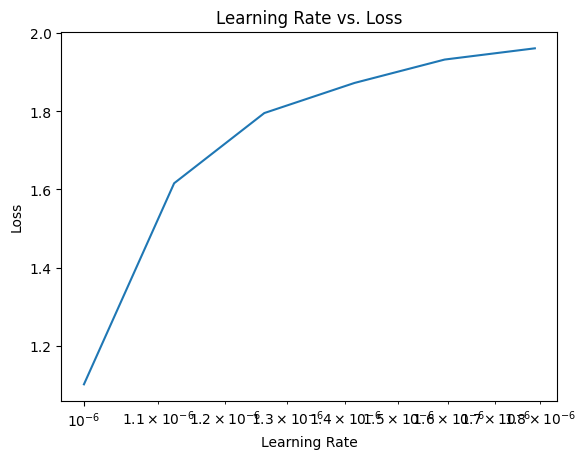

Best Learning Rate: 1e-06


In [34]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 獲取歷史股價數據
df = yf.download('2317.TW', start='2022-06-01', end='2023-06-01')

# 'Open, High, Low, Close, Adj Close, Volume'等欄位只保留'Close'欄位
price_data = df[['Close']].values

# 正規化數據(股價標準化0~1之間)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(price_data)

# 分割數據為訓練集與測試集（80%訓練，20%測試）
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 定義函數用於生成時間序列資料
def generate_sequences(data, seq_length):
    X=[]
    y=[]
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 設定時間序列長度
sequence_length = 10

# 生成訓練集的時間序列資料
X_train, y_train = generate_sequences(train_data, sequence_length)

# 生成測試集的時間序列資料
X_test, y_test = generate_sequences(test_data, sequence_length)

# 定義RNN模型(五個隱藏層)
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

# 定義回調函數，用於尋找最適當的學習率
class LearningRateFinder(tf.keras.callbacks.Callback):
    def __init__(self, start_lr, end_lr, num_samples):
        super(LearningRateFinder, self).__init__()
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.num_samples = num_samples
        self.learning_rates = []
        self.losses = []

    def on_train_begin(self, logs=None):
        self.learning_rates = np.logspace(np.log10(self.start_lr), np.log10(self.end_lr), self.num_samples)

    def on_train_batch_end(self, batch, logs=None):
        lr = self.learning_rates[len(self.losses)]
        tf.keras.backend.set_value(self.model.optimizer.lr, lr)
        self.losses.append(logs.get('loss'))

    def plot_lr_vs_loss(self):
        plt.plot(self.learning_rates[:len(self.losses)], self.losses)
        plt.xscale('log')
        plt.xlabel('Learning Rate')
        plt.ylabel('Loss')
        plt.title('Learning Rate vs. Loss')
        plt.show()

# 設定學習率搜尋範圍
start_lr = 1e-6
end_lr = 1e-1
num_samples = 100

# 創建回調函數
lr_finder = LearningRateFinder(start_lr, end_lr, num_samples)

# 編譯模型
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

# 執行學習率搜尋
model.fit(X_train, y_train, epochs=1, batch_size=32, callbacks=[lr_finder])

# 繪製學習率與損失的圖表
lr_finder.plot_lr_vs_loss()

# 找到最佳學習率
min_loss_idx = np.argmin(lr_finder.losses)
best_learning_rate = lr_finder.learning_rates[min_loss_idx]

print("Best Learning Rate:", best_learning_rate)


Step.2.2 使用最佳學習率預測

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 8s 119ms/step - loss: 0.1126
Epoch 2/10
6/6 [==============================] - 0s 64ms/step - loss: 0.1032
Epoch 3/10
6/6 [==============================] - 1s 88ms/step - loss: 0.0946
Epoch 4/10
6/6 [==============================] - 0s 54ms/step - loss: 0.0871
Epoch 5/10
6/6 [==============================] - 0s 51ms/step - loss: 0.0803
Epoch 6/10
6/6 [==============================] - 1s 212ms/step - loss: 0.0748
Epoch 7/10
6/6 [==============================] - 1s 98ms/step - loss: 0.0699
Epoch 8/10
6/6 [==============================] - 0s 55ms/step - loss: 0.0661
Epoch 9/10
6/6 [==============================] - 1s 161ms/step - loss: 0.0632
Epoch 10/10
6/6 [==============================] - 2s 441ms/step - loss: 0.0607


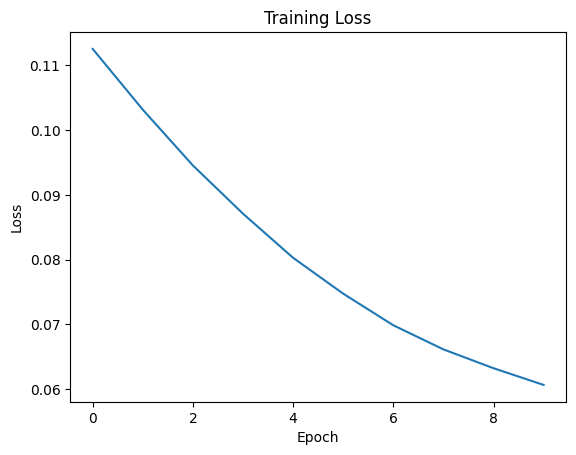

2/2 [==============================] - 1s 11ms/step
Predicted: 105.9688720703125, Actual: 0.31428571428571406
Predicted: 105.45571899414062, Actual: 0.2857142857142856
Predicted: 108.99273681640625, Actual: 0.2857142857142856
Predicted: 105.55741119384766, Actual: 0.31428571428571406
Predicted: 104.53091430664062, Actual: 0.2571428571428571
Predicted: 105.6016845703125, Actual: 0.2857142857142856
Predicted: 106.76481628417969, Actual: 0.3714285714285719
Predicted: 105.9286880493164, Actual: 0.3428571428571434
Predicted: 106.11488342285156, Actual: 0.3714285714285719
Predicted: 106.55642700195312, Actual: 0.3428571428571434
Predicted: 107.61444854736328, Actual: 0.3714285714285719
Predicted: 108.94550323486328, Actual: 0.3428571428571434
Predicted: 106.62149047851562, Actual: 0.31428571428571406
Predicted: 106.67305755615234, Actual: 0.2857142857142856
Predicted: 108.13434600830078, Actual: 0.31428571428571406
Predicted: 105.58346557617188, Actual: 0.31428571428571406
Predicted: 105.922

In [42]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 獲取歷史股價數據
df = yf.download('2317.TW', start='2022-06-01', end='2023-06-01')
#print(df)

# 'Open, High, Low, Close, Adj Close, Volume'等欄位只保留'Close'欄位
price_data = df[['Close']].values
#print(price_data)

# 正規化數據(股價標準化0~1之間)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(price_data)
#print(scaled_data)

# 分割數據為訓練集與測試集（80%訓練，20%測試）
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 定義函數用於生成時間序列資料
def generate_sequences(data, seq_length):
    X=[]
    y=[]
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 設定時間序列長度
sequence_length = 10

# 生成訓練集的時間序列資料
X_train, y_train = generate_sequences(train_data, sequence_length)

# 生成測試集的時間序列資料
X_test, y_test = generate_sequences(test_data, sequence_length)

# 定義RNN模型(五個隱藏層)
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

# 編譯模型，使用最佳學習率
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-06)  # 修改學習率為1e-06
model.compile(optimizer=optimizer, loss='mse')

# 訓練模型
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# 繪製訓練過程圖表
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 使用模型進行預測
predictions = model.predict(X_test)

# 將預測結果還原回原始範圍
predicted_prices = scaler.inverse_transform(predictions)
#test_data = scaler.inverse_transform(test_data)

# 印出預測結果
for i in range(len(predicted_prices)):
    print(f"Predicted: {predicted_prices[i][0]}, Actual: {test_data[i+sequence_length][0]}")

# 預測未來股價
last_data = test_data[-sequence_length:]
future_sequence = np.array([last_data])
future_predictions = model.predict(future_sequence)
predicted_price = scaler.inverse_transform(future_predictions)
print(f"Predicted Future Price: {predicted_price[0][0]}")

# 指定要預測的日期
prediction_date = '2023-06-12'

# 取得指定日期的預測結果
predicted_price_pred = predicted_prices[-1][0]

print(f"Predicted Price for {prediction_date}: {predicted_price_pred}")

# 4. 不同Batch Size 的訓練圖

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
12/12 [==============================] - 7s 201ms/step - loss: 0.3766 - accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 2s 174ms/step - loss: 0.0425 - accuracy: 0.0054
Epoch 3/10
12/12 [==============================] - 1s 49ms/step - loss: 0.0233 - accuracy: 0.0054
Epoch 4/10
12/12 [==============================] - 1s 63ms/step - loss: 0.0172 - accuracy: 0.0054
Epoch 5/10
12/12 [==============================] - 1s 66ms/step - loss: 0.0150 - accuracy: 0.0054
Epoch 6/10
12/12 [==============================] - 1s 42ms/step - loss: 0.0132 - accuracy: 0.0054
Epoch 7/10
12/12 [==============================] - 1s 61ms/step - loss: 0.0133 - accuracy: 0.0054
Epoch 8/10
12/12 [==============================] - 1s 65ms/step - loss: 0.0118 - accuracy: 0.0054
Epoch 9/10
12/12 [==============================] - 1s 48ms/step - loss: 0.0151 - accuracy: 0.0054
Epoch 10/10
12/12 [===============

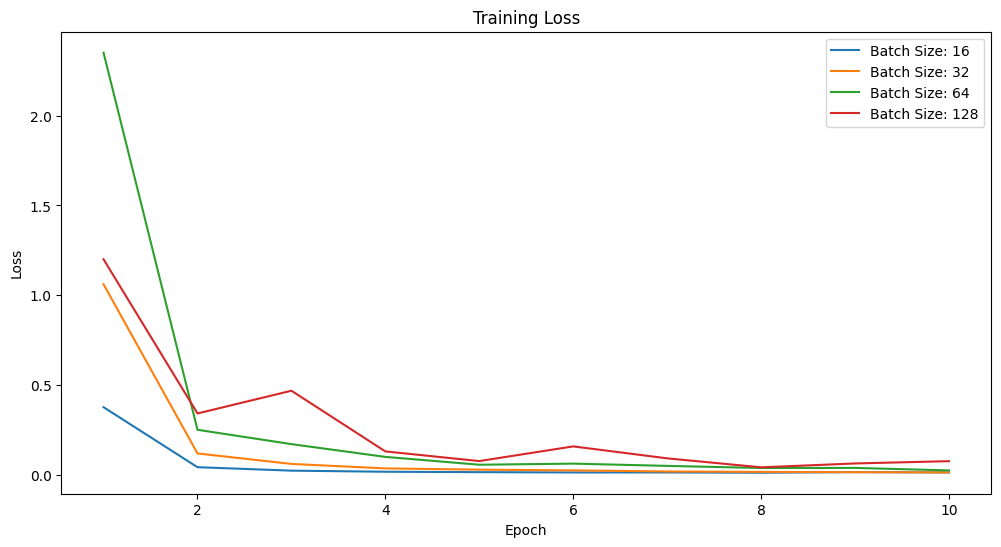

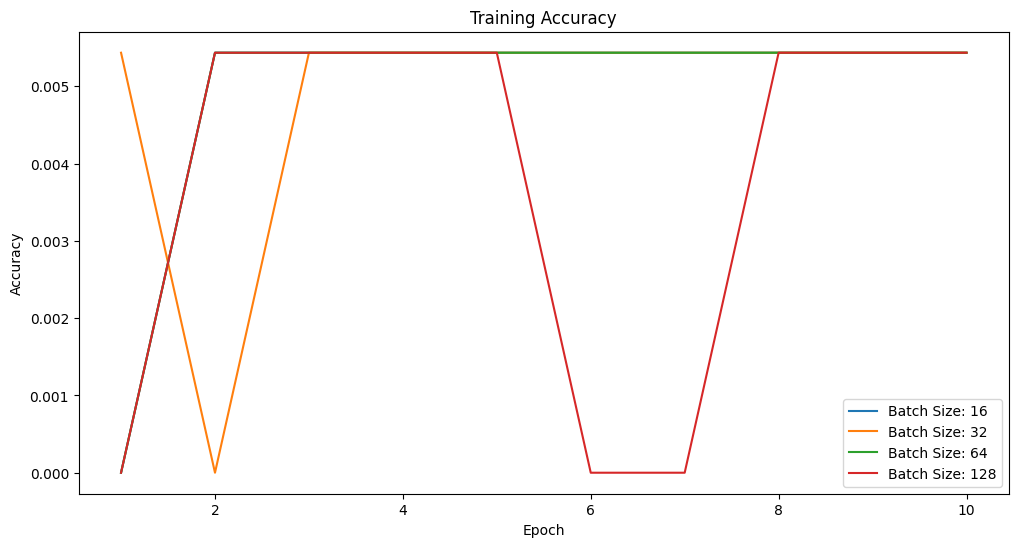

In [36]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 獲取歷史股價數據
df = yf.download('2317.TW', start='2022-06-01', end='2023-06-01')

# 'Open, High, Low, Close, Adj Close, Volume'等欄位只保留'Close'欄位
price_data = df[['Close']].values

# 正規化數據(股價標準化0~1之間)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(price_data)

# 分割數據為訓練集與測試集（80%訓練，20%測試）
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 定義函數用於生成時間序列資料
def generate_sequences(data, seq_length):
    X=[]
    y=[]
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 設定時間序列長度
sequence_length = 10

# 生成訓練集的時間序列資料
X_train, y_train = generate_sequences(train_data, sequence_length)

# 生成測試集的時間序列資料
X_test, y_test = generate_sequences(test_data, sequence_length)

# 定義不同的批量大小
batch_sizes = [16, 32, 64, 128]

# 儲存每個批量大小的訓練損失和訓練準確度
train_losses = []
train_accuracies = []

# 訓練模型並記錄訓練損失和訓練準確度
for batch_size in batch_sizes:
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
        tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
        tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
        tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
        tf.keras.layers.SimpleRNN(units=64, activation='tanh'),
        tf.keras.layers.Dense(units=1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size)
    train_losses.append(history.history['loss'])
    train_accuracies.append(history.history['accuracy'])

# 繪製訓練損失圖表
plt.figure(figsize=(12, 6))
for i in range(len(batch_sizes)):
    plt.plot(range(1, 11), train_losses[i], label=f'Batch Size: {batch_sizes[i]}')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 繪製訓練準確度圖表
plt.figure(figsize=(12, 6))
for i in range(len(batch_sizes)):
    plt.plot(range(1, 11), train_accuracies[i], label=f'Batch Size: {batch_sizes[i]}')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 5. 數值預測

In [50]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt

# 獲取歷史股價數據
df = yf.download('2317.TW', start='2022-06-01', end='2023-06-01')

# 'Open, High, Low, Close, Adj Close, Volume'等欄位只保留'Close'欄位
price_data = df[['Close']].values

# 正規化數據(股價標準化0~1之間)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(price_data)

# 分割數據為訓練集與測試集（80%訓練，20%測試）
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 定義函數用於生成時間序列資料
def generate_sequences(data, seq_length):
    X=[]
    y=[]
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 設定時間序列長度
sequence_length = 10

# 生成訓練集的時間序列資料
X_train, y_train = generate_sequences(train_data, sequence_length)

# 生成測試集的時間序列資料
X_test, y_test = generate_sequences(test_data, sequence_length)

# 定義RNN模型(五個隱藏層)
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

# 編譯模型，使用最佳學習率
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-06)  # 修改學習率為1e-06
model.compile(optimizer=optimizer, loss='mse')

# 訓練模型
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# 使用模型進行預測
predictions = model.predict(X_test)

# 將預測結果還原回原始範圍
predicted_prices = scaler.inverse_transform(predictions)

print()

# 計算MAE
mae = mean_absolute_error(scaler.inverse_transform(y_test), predicted_prices)
print(f"MAE: {mae}")

# 計算MPE
mpe = np.mean((scaler.inverse_transform(y_test) - predicted_prices) / scaler.inverse_transform(y_test))
print(f"MPE: {mpe}")

# 計算MAPE
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), predicted_prices) * 100
print(f"MAPE: {mape}")

# 計算R^2得分
r2 = r2_score(scaler.inverse_transform(y_test), predicted_prices)
print(f"R^2: {r2}")

# 計算Explained Variance Score
explained_variance = explained_variance_score(scaler.inverse_transform(y_test), predicted_prices)
print(f"Explained Variance Score: {explained_variance}")


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 6s 56ms/step - loss: 1.8199
Epoch 2/10
6/6 [==============================] - 0s 46ms/step - loss: 1.7615
Epoch 3/10
6/6 [==============================] - 3s 520ms/step - loss: 1.7028
Epoch 4/10
6/6 [==============================] - 1s 86ms/step - loss: 1.6469
Epoch 5/10
6/6 [==============================] - 0s 51ms/step - loss: 1.5909
Epoch 6/10
6/6 [==============================] - 0s 58ms/step - loss: 1.5365
Epoch 7/10
6/6 [==============================] - 2s 462ms/step - loss: 1.4831
Epoch 8/10
6/6 [==============================] - 1s 106ms/step - loss: 1.4317
Epoch 9/10
6/6 [==============================] - 2s 429ms/step - loss: 1.3813
Epoch 10/10
2/2 [==============================] - 1s 779ms/step

MAE: 17.894077790089142
MPE: 0.17195985183636334
MAPE: 17.195985183636335
R^2: -175.01957944603683
Explained Variance Score: -1.3315664803609328


# 6. 類別預測

In [49]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

# 獲取歷史股價數據
df = yf.download('2317.TW', start='2022-06-01', end='2023-06-01')

# 'Open, High, Low, Close, Adj Close, Volume'等欄位只保留'Close'欄位
price_data = df[['Close']].values

# 正規化數據(股價標準化0~1之間)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(price_data)

# 分割數據為訓練集與測試集（80%訓練，20%測試）
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 定義函數用於生成時間序列資料
def generate_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        # 將下一個時間步的值作為二元預測目標
        if data[i + seq_length] > data[i + seq_length - 1]:
            y.append(1)  # 上漲
        else:
            y.append(0)  # 下跌
    return np.array(X), np.array(y)

# 設定時間序列長度
sequence_length = 10

# 生成訓練集的時間序列資料
X_train, y_train = generate_sequences(train_data, sequence_length)

# 生成測試集的時間序列資料
X_test, y_test = generate_sequences(test_data, sequence_length)

# 定義RNN模型(五個隱藏層)
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

# 編譯模型，使用最佳學習率
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-06)  # 修改學習率為1e-06
model.compile(optimizer=optimizer, loss='mse')

# 訓練模型
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# 使用模型進行預測
predictions = model.predict(X_test)

# 將預測結果轉換為二元類別
binary_predictions = np.where(predictions > 0.5, 1, 0)

# 計算類別預測的評估指標
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
auc_roc = roc_auc_score(y_test, binary_predictions)
kappa = cohen_kappa_score(y_test, binary_predictions)

print()

# 印出評估指標
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {auc_roc}")
print(f"Cohen's Kappa: {kappa}")


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 9s 233ms/step - loss: 0.7923
Epoch 2/10
6/6 [==============================] - 0s 53ms/step - loss: 0.7633
Epoch 3/10
6/6 [==============================] - 2s 438ms/step - loss: 0.7364
Epoch 4/10
6/6 [==============================] - 2s 316ms/step - loss: 0.7084
Epoch 5/10
6/6 [==============================] - 1s 263ms/step - loss: 0.6828
Epoch 6/10
6/6 [==============================] - 1s 274ms/step - loss: 0.6571
Epoch 7/10
6/6 [==============================] - 1s 103ms/step - loss: 0.6341
Epoch 8/10
6/6 [==============================] - 2s 440ms/step - loss: 0.6117
Epoch 9/10
6/6 [==============================] - 0s 53ms/step - loss: 0.5891
Epoch 10/10
2/2 [==============================] - 1s 16ms/step

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.5
Cohen's Kappa: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7. 計算並評估具有最佳超參數組合的模型測試誤差

In [53]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 獲取歷史股價數據
df = yf.download('2317.TW', start='2022-06-01', end='2023-06-01')

# 'Open, High, Low, Close, Adj Close, Volume'等欄位只保留'Close'欄位
price_data = df[['Close']].values

# 正規化數據(股價標準化0~1之間)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(price_data)

# 分割數據為訓練集與測試集（80%訓練，20%測試）
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 定義函數用於生成時間序列資料
def generate_sequences(data, seq_length):
    X=[]
    y=[]
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 設定時間序列長度
sequence_length = 10

# 生成訓練集的時間序列資料
X_train, y_train = generate_sequences(train_data, sequence_length)

# 生成測試集的時間序列資料
X_test, y_test = generate_sequences(test_data, sequence_length)

# 定義RNN模型(五個隱藏層)
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

# 編譯模型，使用最佳學習率
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-06)  # 修改學習率為1e-06
model.compile(optimizer=optimizer, loss='mse')

# 宣告變數來儲存最佳模型和測試誤差
best_model = None
best_error = float('inf')  # 初始化為最大值

# 訓練模型並計算測試誤差
history = model.fit(X_train, y_train, epochs=10, batch_size=32)
# 使用模型進行預測
predictions = model.predict(X_test)
# 將預測結果還原回原始範圍
predicted_prices = scaler.inverse_transform(predictions)
# 計算測試誤差，使用RMSE
test_error = np.sqrt(np.mean((predicted_prices - scaler.inverse_transform(y_test))**2))

# 判斷是否是目前最佳誤差，如果是則更新最佳模型
if test_error < best_error:
    best_error = test_error
    best_model = model

# 使用最佳模型進行預測
predictions_best = best_model.predict(X_test)

# 將預測結果還原回原始範圍
predicted_prices_best = scaler.inverse_transform(predictions_best)

# 計算最佳模型的測試誤差，這裡使用 RMSE
best_test_error = np.sqrt(np.mean((predicted_prices_best - scaler.inverse_transform(y_test))**2))

print(f"Best Test Error: {best_test_error}")


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
6/6 [==============================] - 6s 242ms/step - loss: 2.7020
Epoch 2/10
6/6 [==============================] - 0s 52ms/step - loss: 2.6438
Epoch 3/10
6/6 [==============================] - 0s 43ms/step - loss: 2.5863
Epoch 4/10
6/6 [==============================] - 1s 205ms/step - loss: 2.5289
Epoch 5/10
6/6 [==============================] - 1s 100ms/step - loss: 2.4733
Epoch 6/10
6/6 [==============================] - 0s 55ms/step - loss: 2.4182
Epoch 7/10
6/6 [==============================] - 0s 90ms/step - loss: 2.3627
Epoch 8/10
6/6 [==============================] - 1s 99ms/step - loss: 2.3084
Epoch 9/10
6/6 [==============================] - 4s 805ms/step - loss: 2.2552
Epoch 10/10
2/2 [==============================] - 0s 9ms/step
Best Test Error: 26.642030203348543
